In [20]:
from clickhouse_connect import get_client
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up client
client = get_client(
    host='localhost',
    port=8123,
    username='default',
    password='mysecurepassword'
)

# Define time range
query = f"""
SELECT
    timestamp,
    price,
    volume
FROM price_ticks
ORDER BY timestamp ASC
"""

# Run query and convert to DataFrame
result = client.query(query)
df = pd.DataFrame(result.result_rows, columns=['timestamp', 'price', 'volume'])

# Show the first few rows
df.head()

,timestamp,price,volume
0,2025-05-14 06:08:02,2691.54,0.0020
1,2025-05-14 06:08:02,2691.55,0.0020
2,2025-05-14 06:08:02,2691.59,0.0020
3,2025-05-14 06:08:02,2691.60,0.0486
4,2025-05-14 06:08:02,2691.60,0.0020


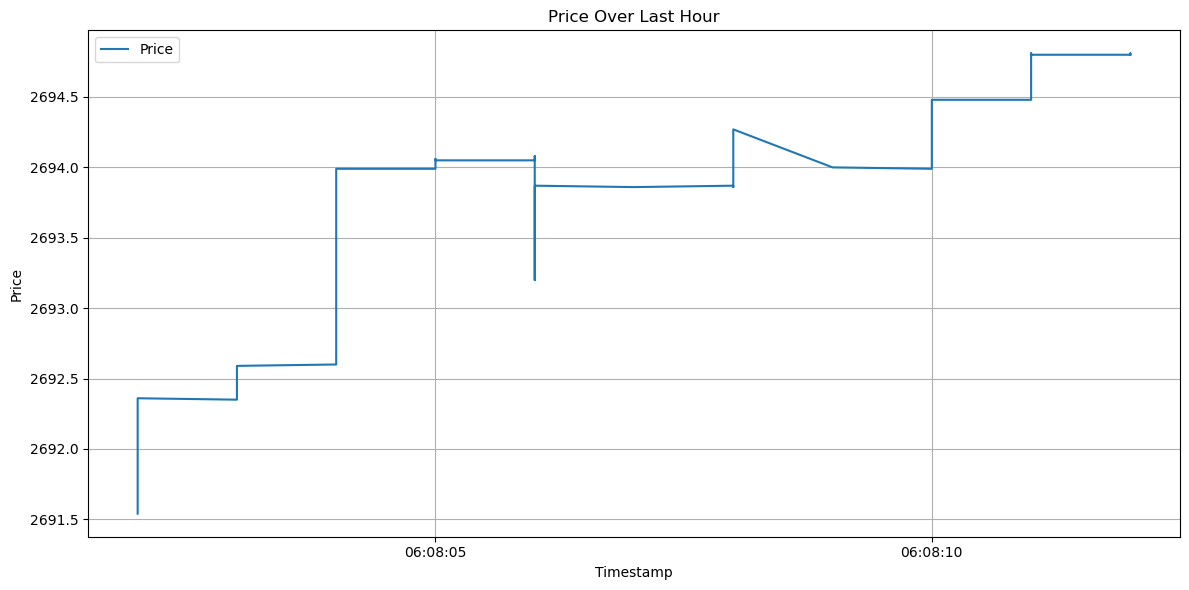

In [21]:


# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price')
plt.title('Price Over Last Hour')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
len(df)  # Display the number of rows in the DataFrame

797

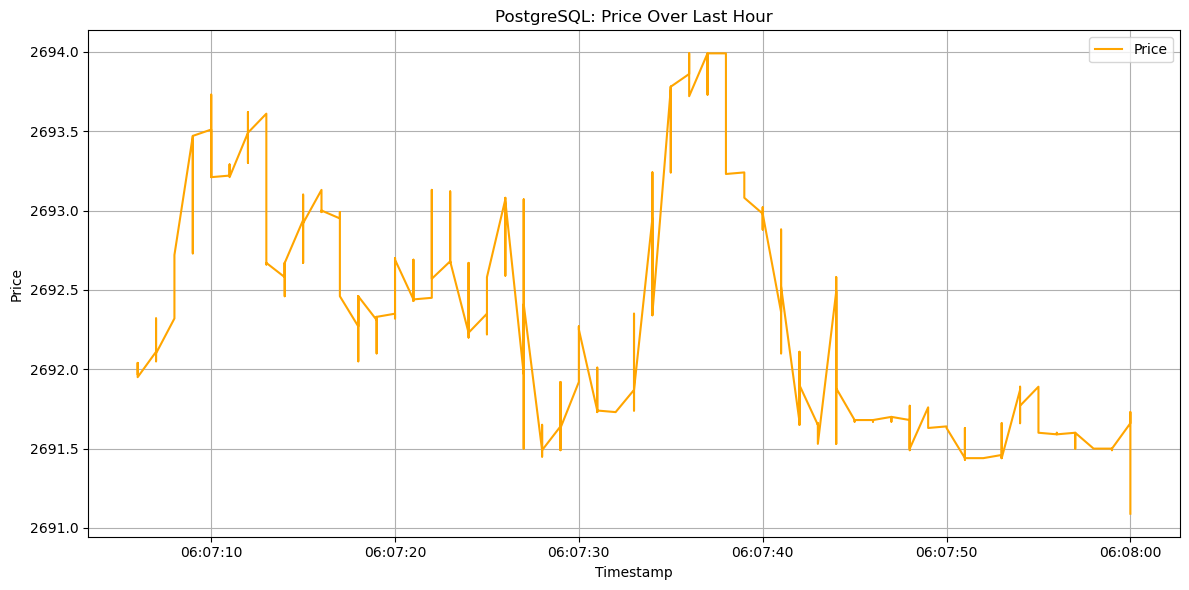

In [23]:
# postgres_plot.py

import psycopg2
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname='price_data',
    user='postgres',
    password='mypgpassword',
    host='localhost',
    port=5432
)
cursor = conn.cursor()

# Define time range
one_hour_ago = datetime.now(timezone.utc) - timedelta(hours=1)

# Fetch data
query = """
SELECT timestamp, price, volume
FROM price_ticks
WHERE timestamp >= %s
ORDER BY timestamp ASC
"""
cursor.execute(query, (one_hour_ago,))
rows = cursor.fetchall()

# Convert to DataFrame
df_pg = pd.DataFrame(rows, columns=['timestamp', 'price', 'volume'])
df_pg['timestamp'] = pd.to_datetime(df_pg['timestamp'])

# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df_pg['timestamp'], df_pg['price'], label='Price', color='orange')
plt.title('PostgreSQL: Price Over Last Hour')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
len(df_pg)

3159

In [25]:
import boto3, os
from dotenv import load_dotenv

load_dotenv()

s3 = boto3.client('s3',
    region_name=os.getenv('AWS_REGION'),
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY')
)

# list all buckets
response = s3.list_buckets()
print("Your S3 buckets:", [b['Name'] for b in response['Buckets']])

Your S3 buckets: ['tickerdata-v1-etk']
